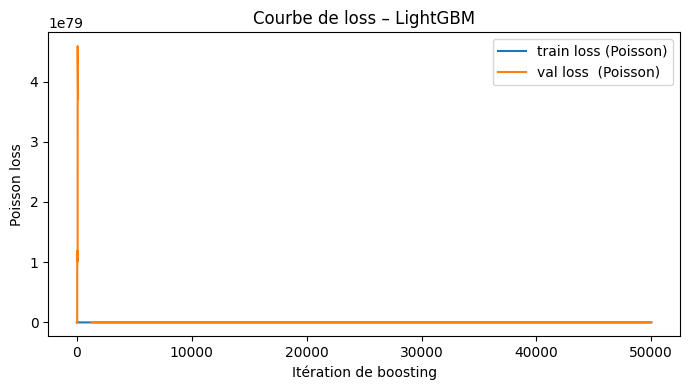

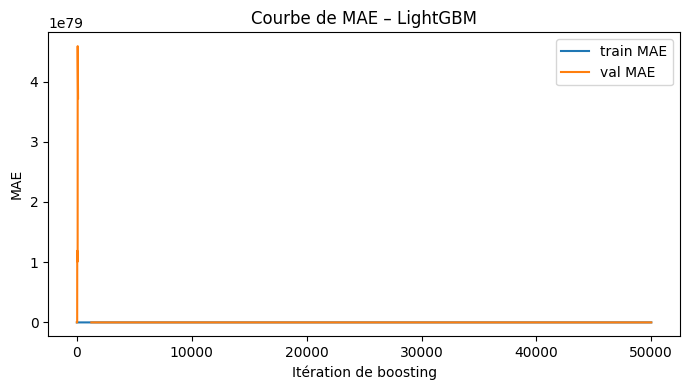

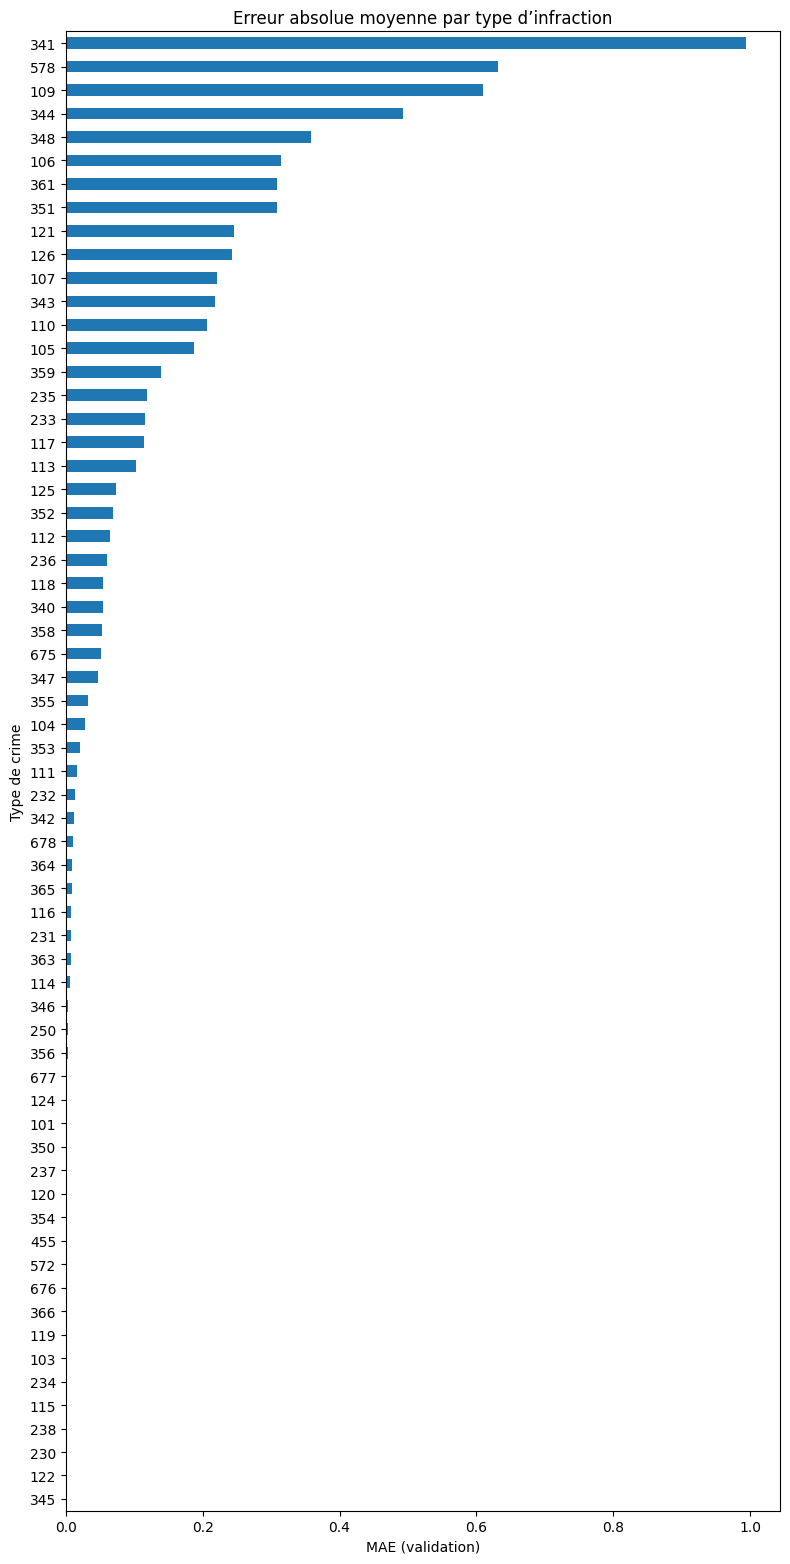


Top‑5 crimes les moins bien prédits :
341   0.9942
578   0.6320
109   0.6099
344   0.4931
348   0.3576


In [11]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

REPORT_DIR   = Path("./")        # adapter si besoin
HIST_FILE    = REPORT_DIR / "history_lgb.csv"
MAE_FILE     = REPORT_DIR / "mae_validation.csv"

# -------------------------------------------------------------------
# 1. Courbes d’apprentissage (loss + MAE)
# -------------------------------------------------------------------
if HIST_FILE.exists():
    hist = pd.read_csv(HIST_FILE)

    # ── Courbe Poisson loss (si dispo) ─────────────────────────────
    if {"train_poisson", "val_poisson"}.issubset(hist.columns):
        plt.figure(figsize=(7, 4))
        plt.plot(hist["iter"], hist["train_poisson"], label="train loss (Poisson)")
        plt.plot(hist["iter"], hist["val_poisson"],   label="val loss  (Poisson)")
        plt.xlabel("Itération de boosting")
        plt.ylabel("Poisson loss")
        plt.title("Courbe de loss – LightGBM")
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("[info] Colonnes Poisson manquantes : loss non tracée.")

    # ── Courbe MAE ────────────────────────────────────────────────
    plt.figure(figsize=(7, 4))
    plt.plot(hist["iter"], hist["train_mae"], label="train MAE")
    plt.plot(hist["iter"], hist["val_mae"],   label="val MAE")
    plt.xlabel("Itération de boosting")
    plt.ylabel("MAE")
    plt.title("Courbe de MAE – LightGBM")
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print(f"[info] {HIST_FILE.name} absent : pas de courbes d’apprentissage.")

# -------------------------------------------------------------------
# 2. Bar‑plot MAE final par crime
# -------------------------------------------------------------------
mae = (
    pd.read_csv(MAE_FILE, index_col=0)
      .squeeze("columns")
      .sort_values(ascending=False)
)

plt.figure(figsize=(8, max(4, len(mae) * 0.25)))
mae.plot(kind="barh")
plt.xlabel("MAE (validation)")
plt.ylabel("Type de crime")
plt.title("Erreur absolue moyenne par type d’infraction")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
print("\nTop‑5 crimes les moins bien prédits :")
print(mae.head(5).to_string(float_format=lambda x: f"{x:,.4f}"))
